<a href="https://colab.research.google.com/github/Elahe-hmh/ML_Practice/blob/master/Actual_data_min_and_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import io, requests      #the default interface to access files and streams
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from sklearn.linear_model import LinearRegression

In [0]:
def loss(y_list, x_list, w_list, bias=0):
    n_sample = len(y_list)
    y_list = y_list.reshape(n_sample,1)
    x_list = x_list.reshape(n_sample,1)
#     print(y_list.shape, x_list.shape)
    f_list =  ( np.dot(x_list, w_list ) + bias ).reshape( len(y_list)  , 1 )
    return np.sqrt( np.sum(  ( y_list - f_list )**2 )   )/n_sample


In [0]:
url = 'https://raw.githubusercontent.com/sraeisi/MachineLearning_Physics/master/Lec_1/Spring.csv'
s=requests.get(url).content
exp_data=pd.read_csv(io.StringIO(s.decode('utf-8')))

In [32]:
exp_data

,Displacement,Force
0,11.5,0.0
1,14.7,0.1
2,18.0,0.2
3,21.3,0.3
4,24.5,0.4
5,27.6,0.5


In [0]:
exp_w_axis = np.arange(-.1,.1, .001)
exp_losses = [loss(exp_data['Force'].values, exp_data['Displacement'].values, w,bias=0 ) for w in exp_w_axis]

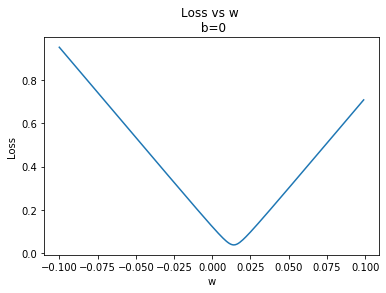

In [34]:
fig = plt.figure()
ax = fig.add_subplot(111, xlabel='w', ylabel='Loss', title='Loss vs w \n b=0')
ax.plot(exp_w_axis, exp_losses)

plt.show()

In [35]:
exp_min_w = minimize((lambda w: loss(exp_data['Force'].values, exp_data['Displacement'].values, [w[0]],w[1] )),[.1,.1])
print('At the minimum, the loss is {}.'.format(loss(exp_data['Force'].values, exp_data['Displacement'].values,[exp_min_w.x[0] ],exp_min_w.x[1]) ) )

At the minimum, the loss is 0.0007182370023728148.


In [0]:
exp_reg = LinearRegression()
exp_reg.fit(exp_data['Displacement'].values.reshape(len(exp_data),1), exp_data['Force'])
exp_x = np.arange(10,30,.5).reshape(40,1)


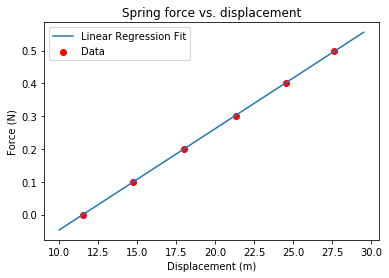

In [38]:
x_label = 'Displacement (m)'
y_label = 'Force (N)'
plt_title = 'Spring force vs. displacement'

fig = plt.figure()
ax = fig.add_subplot(111, xlabel=x_label, ylabel=y_label, title=plt_title)

ax.plot( exp_x , exp_reg.predict( exp_x ) ,label='Linear Regression Fit' )
ax.scatter(exp_data.Displacement , exp_data.Force, color='r',label='Data' )
ax.legend(loc=0)
plt.show()